In [42]:
print("hello world")

hello world


In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [44]:
df = pd.read_csv("/Users/hj/Documents/무제/심화 프로젝트/train.csv", sep=',')
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [45]:
trade = pd.read_csv("/Users/hj/Documents/무제/심화 프로젝트/international_trade.csv", sep=',')
trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [93]:
df.describe()

,timestamp,supply(kg),price(원/kg)
count,59397,5.939700e+04,59397.000000
mean,2021-01-31 00:00:00,1.189453e+04,1131.680674
min,2019-01-01 00:00:00,0.000000e+00,0.000000
25%,2020-01-16 00:00:00,0.000000e+00,0.000000
50%,2021-01-31 00:00:00,0.000000e+00,0.000000
75%,2022-02-16 00:00:00,3.800000e+03,1519.000000
max,2023-03-03 00:00:00,1.222800e+06,20909.000000
std,NaN,5.226400e+04,2029.941445


In [98]:
df.groupby('item')['price(원/kg)'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
BC,13707.0,910.196615,1422.148301,0.0,0.00,0.0,2032.50,8750.0
CB,7615.0,152.187131,345.053036,0.0,0.00,0.0,0.00,2500.0
CR,10661.0,273.118938,632.929933,0.0,0.00,0.0,0.00,3882.0
RD,12184.0,187.073539,358.150266,0.0,0.00,0.0,383.00,5715.0
TG,15230.0,3177.442022,2805.240092,0.0,992.25,2273.5,5532.75,20909.0


In [99]:
df_nonzero.groupby('item')['price(원/kg)'].describe()

# bc, rd, tg 이상치

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
BC,4525.0,2757.141436,1016.862765,205.0,2050.00,2518.0,3321.00,8750.0
CB,1620.0,715.373457,395.976956,162.0,396.75,619.0,975.25,2500.0
CR,2082.0,1398.521134,690.966629,250.0,923.25,1159.0,1699.25,3882.0
RD,4040.0,564.184158,417.250968,50.0,385.00,468.0,578.25,5715.0
TG,11675.0,4144.962912,2501.018590,551.0,1802.50,3847.0,6037.00,20909.0


In [48]:
df['item'].value_counts()

# 감귤 > 브로콜리 > 무 > 당근 > 양배추 

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

In [49]:
df['corporation'].value_counts()

corporation
A    13707
E    13707
D    12184
C     9138
B     7615
F     3046
Name: count, dtype: int64

In [50]:
df['location'].value_counts()

location
J    35029
S    24368
Name: count, dtype: int64

In [51]:
df_cnt = df.groupby('item')['supply(kg)'].agg(['count', 'sum'])
df_cnt

,count,sum
item,,
BC,13707,1.370782e+07
CB,7615,8.560427e+07
CR,10661,5.388242e+07
RD,12184,3.371415e+08
TG,15230,2.161631e+08


In [52]:
type(df['timestamp'][0])

str

In [53]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [54]:
type(df['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [55]:
df['price(원/kg)'].value_counts()

price(원/kg)
0.0       35455
500.0        50
1000.0       45
550.0        42
400.0        41
          ...  
6234.0        1
5686.0        1
5818.0        1
5652.0        1
655.0         1
Name: count, Length: 7094, dtype: int64

<Axes: xlabel='item', ylabel='price(원/kg)'>

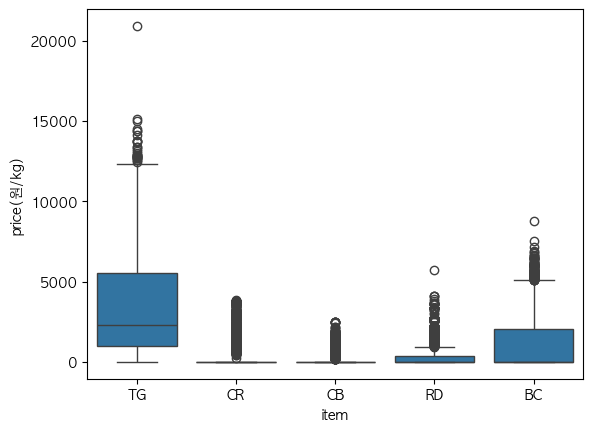

In [85]:
sns.boxplot(x='item', y='price(원/kg)', data=df)

<Axes: xlabel='item', ylabel='supply(kg)'>

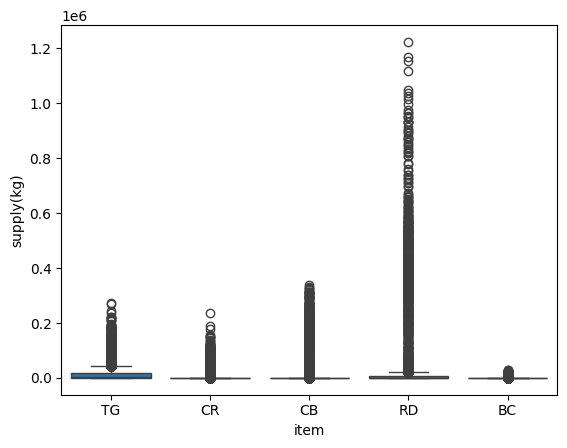

In [73]:
sns.boxplot(x='item', y='supply(kg)', data=df)

In [57]:
df[['supply(kg)','price(원/kg)']].corr()

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.002297
price(원/kg),-0.002297,1.000000


In [64]:
type(df['supply(kg)'][0])

numpy.float64

In [66]:
type(df['price(원/kg)'][0])

numpy.float64

In [67]:
# 법인별 아이템 평균 가격
df.groupby(['corporation', 'item'])['price(원/kg)'].mean()

corporation  item
A            BC      1315.576822
             CB       104.713395
             CR       622.192383
             RD       294.135588
             TG      3112.148063
B            BC       495.778398
             CR       173.214051
             TG      3279.455023
C            BC       474.738674
             CR       278.513460
             RD         5.846356
             TG      3788.332896
D            BC      1192.342088
             CB       106.405121
             CR       214.087328
             RD       181.058109
             TG      3056.239002
E            BC      1213.619829
             CB       186.241628
             CR       204.869009
             RD       140.486540
             TG      2651.035128
F            CB       258.862114
             RD       259.381484
Name: price(원/kg), dtype: float64

In [68]:
rd_df = df[df['item'] == 'RD']
rd_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
31983,RD_A_J_20190101,2019-01-01,RD,A,J,0.0,0.0
31984,RD_A_J_20190102,2019-01-02,RD,A,J,0.0,0.0
31985,RD_A_J_20190103,2019-01-03,RD,A,J,37060.0,367.0
31986,RD_A_J_20190104,2019-01-04,RD,A,J,19260.0,460.0
31987,RD_A_J_20190105,2019-01-05,RD,A,J,32140.0,402.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [79]:
df_nonzero = df[df['price(원/kg)'] != 0]
df_nonzero

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [78]:
zero_supply_count = (df['supply(kg)']==0).sum()
print(zero_supply_count)

print("0인 행들의 비율 : ", (35452/59397)*100 )

35452
0인 행들의 비율 :  59.68651615401451


In [80]:
df_nonzero['item'].value_counts()

item
TG    11675
BC     4525
RD     4040
CR     2082
CB     1620
Name: count, dtype: int64

In [81]:
df_nonzero.groupby('item')['supply(kg)'].sum()

item
BC    1.370782e+07
CB    8.560419e+07
CR    5.388242e+07
RD    3.371415e+08
TG    2.161629e+08
Name: supply(kg), dtype: float64

<Axes: xlabel='item', ylabel='price(원/kg)'>

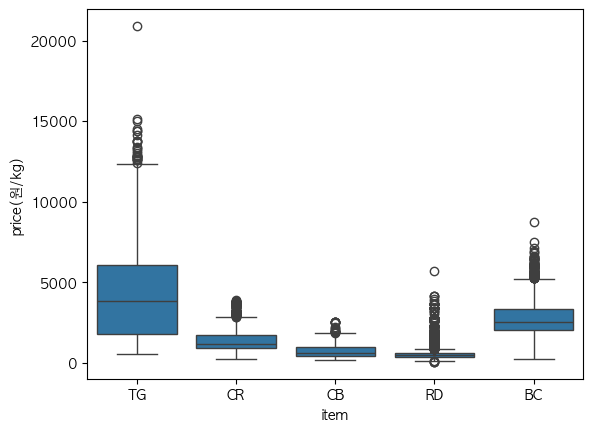

In [86]:
sns.boxplot(x='item', y='price(원/kg)', data=df_nonzero)

<Axes: xlabel='item', ylabel='supply(kg)'>

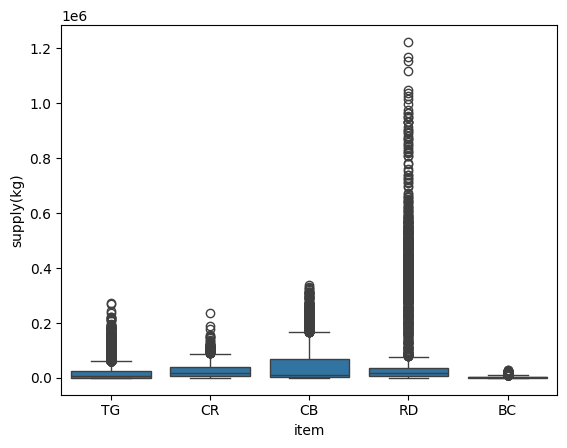

In [83]:
sns.boxplot(x='item', y='supply(kg)', data=df_nonzero)

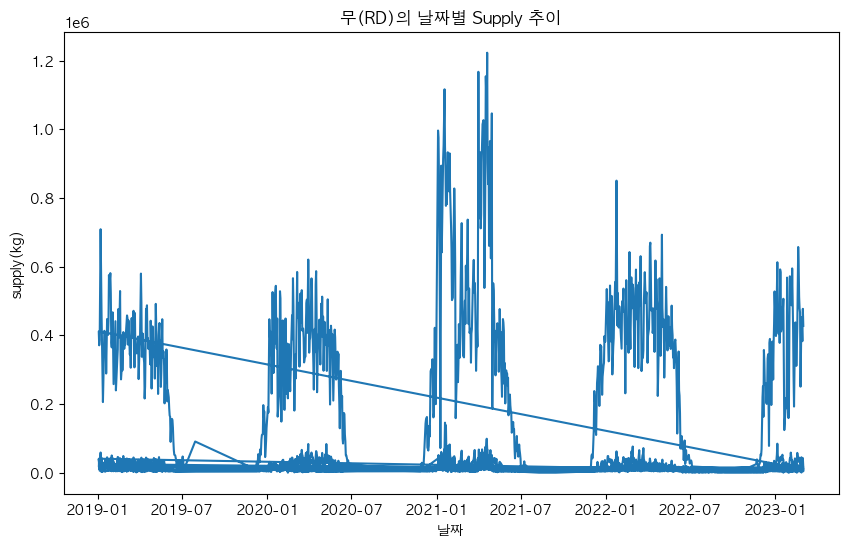

In [91]:
rd_supply_data = df[(df['item']=='RD') & (df['supply(kg)'] != 0)]
plt.figure(figsize=(10,6))
plt.plot(rd_supply_data['timestamp'], rd_supply_data['supply(kg)'])
plt.title("무(RD)의 날짜별 Supply 추이")
plt.xlabel("날짜")
plt.ylabel("supply(kg)")
plt.show()

# 그래프 아래 지그재그랑 일자로 그어진 그래프는 뭐지?

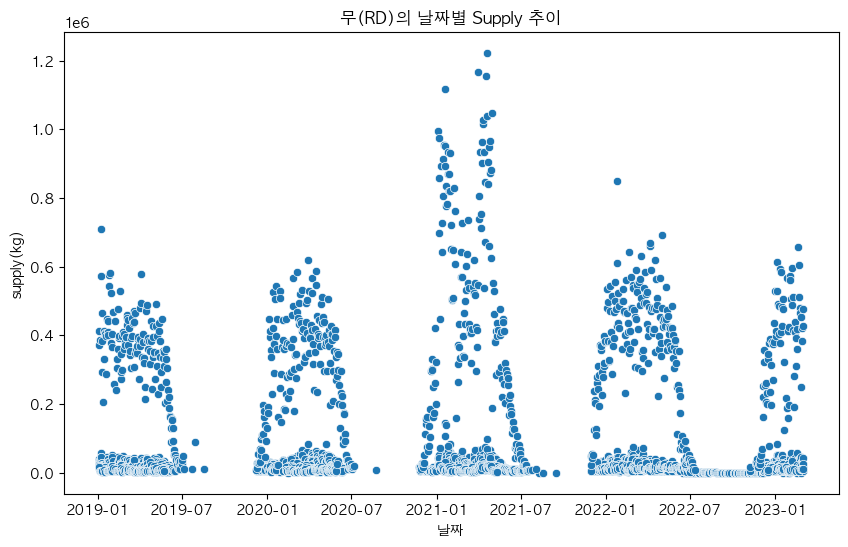

In [105]:
rd_supply_data = df[(df['item']=='RD') & (df['supply(kg)'] != 0)]
plt.figure(figsize=(10,6))
sns.scatterplot(x='timestamp', y='supply(kg)', data=rd_supply_data)
plt.title("무(RD)의 날짜별 Supply 추이")
plt.xlabel("날짜")
plt.ylabel("supply(kg)")
plt.show()

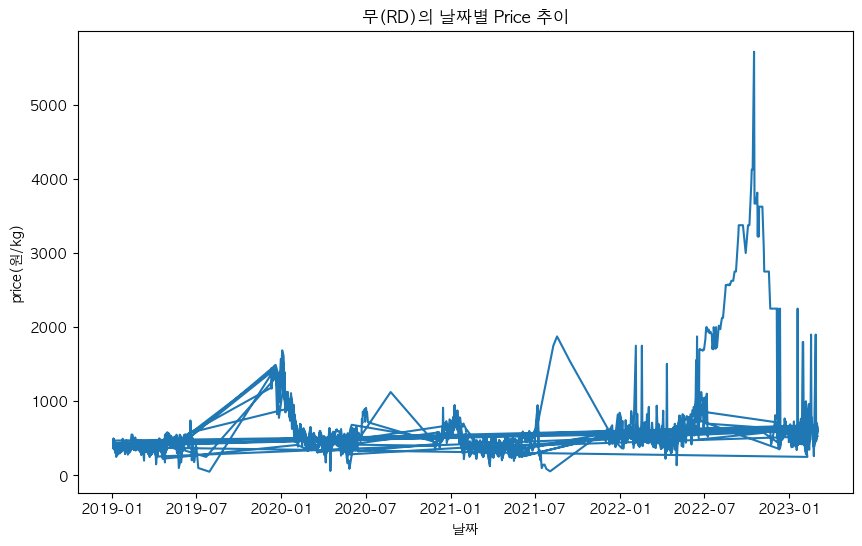

In [101]:
rd_supply_data = df[(df['item']=='RD') & (df['supply(kg)'] != 0)]
plt.figure(figsize=(10,6))
plt.plot(rd_supply_data['timestamp'], rd_supply_data['price(원/kg)'])
plt.title("무(RD)의 날짜별 Price 추이")
plt.xlabel("날짜")
plt.ylabel("price(원/kg)")
plt.show()

# 2022-07~2023-01 사이 가격 이상함

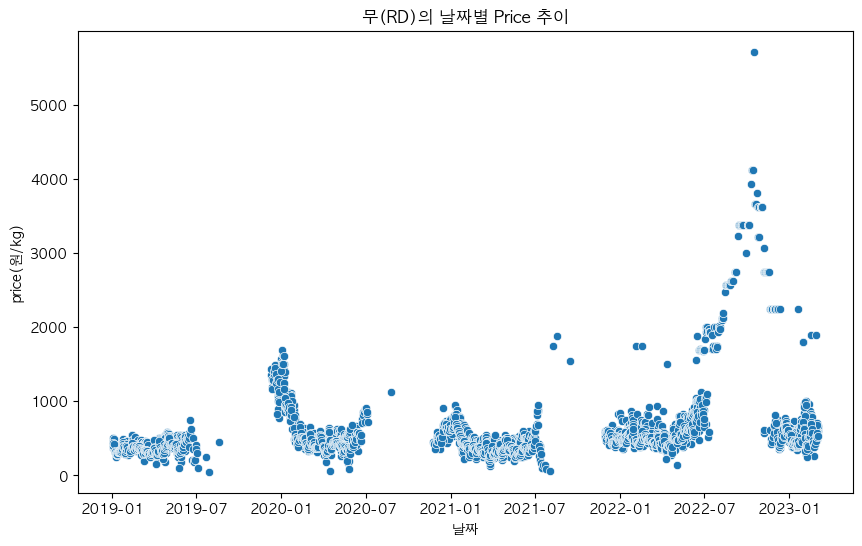

In [103]:
rd_supply_data = df[(df['item']=='RD') & (df['supply(kg)'] != 0)]
plt.figure(figsize=(10,6))
sns.scatterplot(x='timestamp', y='price(원/kg)', data=rd_supply_data)
plt.title("무(RD)의 날짜별 Price 추이")
plt.xlabel("날짜")
plt.ylabel("price(원/kg)")
plt.show()

# 2022-07~2023-01 사이 가격 이상함

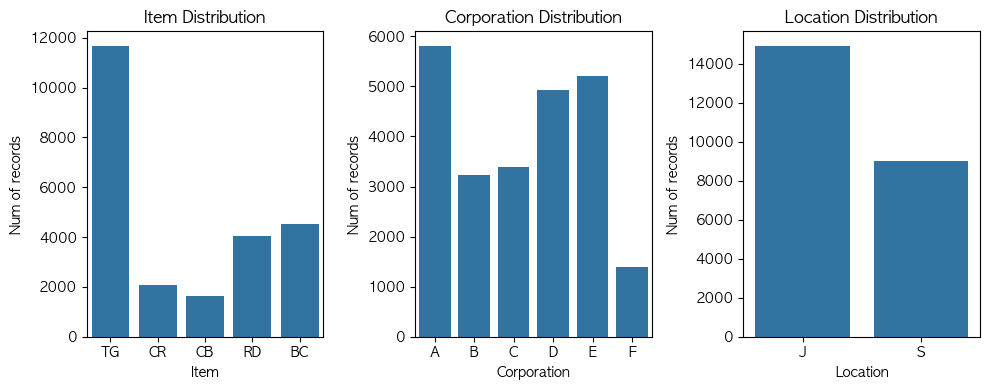

In [100]:
fig = plt.figure(figsize=(10, 4))
plt.subplot(1, 3,  1)
sns.countplot(x='item', data=df_nonzero)
plt.title('Item Distribution')
plt.xlabel('Item')
plt.ylabel('Num of records')

plt.subplot(1, 3,  2)
sns.countplot(x='corporation', data=df_nonzero)
plt.title('Corporation Distribution')
plt.xlabel('Corporation')
plt.ylabel('Num of records')

plt.subplot(1, 3,  3)
sns.countplot(x='location', data=df_nonzero)
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Num of records')

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,20))

sns